# Testing different Hyperparameters

Lets say we want to learn more about __how different learning rates and different image sizes affect our model's accuracy when restricted to 10 epochs__, and we want to build an experiment to test out these hyperparameters.

In this notebook, we'll walk through how we use out Experiment module with the following:

- use python to perform this experiment
- use the CLI to perform this experiment
- evalute the results using Pandas

---

In [29]:
import sys
sys.path.append("../")
import os

from utils_ic.common import ic_root_path, data_path
from utils_ic.datasets import unzip_url, Urls
from utils_ic.experiment import *

Lets download some data that we want to test on. To use the experiments tool for single label classification, we'll need to make sure that the data is stored such that images are sorted into their classes inside of a subfolder. In this notebook, we'll use the Fridge Objects dataset provided in `utils_ic.datasets.Urls`, which is stored in the correct format.

In [24]:
input_data = unzip_url(Urls.fridge_objects_path, exist_ok=True)

## Using Python

We start by creating the Benchmark object:

In [25]:
exp = Experiment()

Before we start testing, it's a good idea to see what the default parameters Are. We can use a the property `parameters` to easily see those default values.

In [26]:
exp.parameters

OrderedDict([('learning_rate', [0.0001]),
             ('epochs', [15]),
             ('batch_size', [16]),
             ('im_size', [299]),
             ('architecture',
              [<Architecture.resnet18: functools.partial(<function resnet18 at 0x7f02b65d07b8>)>]),
             ('transform', [True]),
             ('dropout', [0.5]),
             ('weight_decay', [0.01]),
             ('training_schedule',
              [<TrainingSchedule.head_first_then_body: 3>]),
             ('discriminative_lr', [False]),
             ('one_cycle_policy', [True])])

Now that we know the defaults, we can pass it the parameters we want to test. 

In this notebook, we want to see the effect of different learning rates across different image sizes using only 8 epochs (the default number of epochs is 15). To do so, I would run the `update_parameters` functions as follows:

```python
exp.update_parameters(learning_rate=[1e-3, 1e-4, 1e-5], im_size=[299, 499], epochs=[10])
```

Notice that all parameters must be passed in as a list, including single values such the number of epochs.

These parameters will be used to calculate the number of permutations to run. In this case, we've pass in three options for learning rates, two for image sizes, and one for number of epochs. This will result in 3 X 2 X 1 total permutations (in otherwords, 6 permutations). 

In [27]:
exp.update_parameters(learning_rate=[1e-3, 1e-4, 1e-5], im_size=[299, 499], epochs=[10])

Now that we have our parameters defined, we call the `run()` function with the dataset to test on. 

We can also optionally pass in:
- the number of repetitions to run each permutation (default is 3)
- whether or not we want the training to stop early if the metric (accuracy) doesn't improve by 0.01 (1%) over 3 epochs (default is False)

The `run` function returns a multi-index dataframe which we can work with right away.

In [28]:
df = exp.run(datasets=[input_data], reps=3); df

this Learner object self-destroyed - it still exists, but no longer usable


duration  \
0 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  31.019504   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  47.504721   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  30.684167   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  48.438365   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  32.925156   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  46.102083   
1 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  30.645956   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  45.658119   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  30.607257   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  49.790577   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  32.550092   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  43.410812   
2 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  26.286225   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  47.613607   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  31.817795   
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  47.494252   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  34.835410   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  47.768517   

                                                                    accuracy  
0 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  0.977273  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  0.909091  
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  0.977273  
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  0.977273  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  0.431818  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  0.522727  
1 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  0.977273  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  0.954545  
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  0.886364  
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  0.931818  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  0.409091  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  0.340909  
2 PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  0.954545  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 10]... fridgeObjects  0.909091  
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  0.977273  
  PARAMETERS [learning_rate: 0.001]|[epochs: 10]|... fridgeObjects  0.931818  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  0.431818  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 10]|... fridgeObjects  0.477273

---

## Visualizing our results

When we read in out multi-index dataframe, index 0 represents the run number, index 1 represents a single permutation of parameters, and index 2 represents the dataset.

In [37]:
df = pd.read_csv("../data/11_notebook_test_01.csv", index_col=[0,1,2])

To see the results, show the df using the `clean_df` helper function. This will display all the hyperparameters in a nice, readable way.

In [39]:
df = clean_df(df); df 

duration  \
0 P: [learning_rate: 0.0001] [im_size: 299] [arch... fashionTexture       314.233683   
                                                     flickrLogos32Subset  399.639082   
                                                     food101Subset        286.576837   
                                                     fridgeObjects         23.723359   
                                                     lettuce               31.765429   
                                                     recycle_v3            52.628647   
  P: [learning_rate: 0.0001] [im_size: 299] [arch... fashionTexture       321.546537   
                                                     flickrLogos32Subset  417.679040   
                                                     food101Subset        423.180638   
                                                     fridgeObjects         30.021370   
                                                     lettuce               47.970363   
                                                     recycle_v3            68.740069   
  P: [learning_rate: 0.0001] [im_size: 299] [arch... fashionTexture       307.889330   
                                                     flickrLogos32Subset  411.539340   
                                                     food101Subset        289.289175   
                                                     fridgeObjects         22.126732   
                                                     lettuce               30.533014   
                                                     recycle_v3            50.720692   
  P: [learning_rate: 0.0001] [im_size: 499] [arch... fashionTexture       424.382948   
                                                     flickrLogos32Subset  500.969852   
                                                     food101Subset        550.343580   
                                                     fridgeObjects         38.218864   
                                                     lettuce               61.387076   
                                                     recycle_v3            92.557548   
  P: [learning_rate: 0.0001] [im_size: 499] [arch... fashionTexture       462.986225   
                                                     flickrLogos32Subset  591.740402   
                                                     food101Subset        961.443015   
                                                     fridgeObjects         53.497724   
                                                     lettuce               97.285528   
                                                     recycle_v3           138.287802   
...                                                                              ...   
2 P: [learning_rate: 1e-05] [im_size: 299] [arch:... fashionTexture       325.676502   
                                                     flickrLogos32Subset  420.280063   
                                                     food101Subset        430.405364   
                                                     fridgeObjects         30.542323   
                                                     lettuce               57.187014   
                                                     recycle_v3            69.498450   
  P: [learning_rate: 1e-05] [im_size: 299] [arch:... fashionTexture       316.445364   
                                                     flickrLogos32Subset  397.334706   
                                                     food101Subset        283.718876   
                                                     fridgeObjects         23.056264   
                                                     lettuce               31.263229   
                                                     recycle_v3            51.135338   
  P: [learning_rate: 1e-05] [im_size: 499] [arch:... fashionTexture       431.594055   
                                                     flickrLogos32Subset  503.665983   
                            

Since we've run our benchmarking over 3 repetitions, we may want to just look at the averages across the different __run numbers__.

In [40]:
df.mean(level=(1,2)).T

P: [learning_rate: 0.0001] [im_size: 299] [arch: resnet18]  \
                                                     fashionTexture   
duration                                         312.856266           
accuracy                                           0.871025           

                                                                     \
         flickrLogos32Subset food101Subset fridgeObjects    lettuce   
duration          399.714057    287.105766     23.827483  31.706689   
accuracy            0.903024      0.921212      0.931818   0.925333   

                     \
         recycle_v3   
duration  53.996109   
accuracy   0.946237   

         P: [learning_rate: 0.0001] [im_size: 299] [arch: resnet50]  \
                                                     fashionTexture   
duration                                         323.720131           
accuracy                                           0.886926           

                                                          ...  \
         flickrLogos32Subset food101Subset fridgeObjects  ...   
duration          418.269339     423.90489     30.193552  ...   
accuracy            0.937684       0.94000      1.000000  ...   

         P: [learning_rate: 1e-05] [im_size: 499] [arch: resnet50]  \
                                                     food101Subset   
duration                                         964.203778          
accuracy                                           0.928485          

                                               \
         fridgeObjects    lettuce  recycle_v3   
duration     53.546689  97.878897  138.637125   
accuracy      0.780303   0.805333    0.865592   

         P: [learning_rate: 1e-05] [im_size: 499] [arch: squeezenet1_1]  \
                                                         fashionTexture   
duration                                         421.111203               
accuracy                                           0.459364               

                                                                                
         flickrLogos32Subset food101Subset fridgeObjects    lettuce recycle_v3  
duration          491.797521    535.468289     35.006170  59.193389  88.852025  
accuracy            0.262168      0.761616      0.303031   0.666667   0.340502  

[2 rows x 108 columns]

Additionally, we may want simply to see which set of hyperparameters perform the best across the different __datasets__. We can do that by averaging the results of the different datasets. (The results of this step will look similar to the above since we're only passing in one dataset).

In [42]:
df.mean(level=(1)).T

,P: [learning_rate: 0.0001] [im_size: 299] [arch: resnet18],P: [learning_rate: 0.0001] [im_size: 299] [arch: resnet50],P: [learning_rate: 0.0001] [im_size: 299] [arch: squeezenet1_1],P: [learning_rate: 0.0001] [im_size: 499] [arch: resnet18],P: [learning_rate: 0.0001] [im_size: 499] [arch: resnet50],P: [learning_rate: 0.0001] [im_size: 499] [arch: squeezenet1_1],P: [learning_rate: 0.001] [im_size: 299] [arch: resnet18],P: [learning_rate: 0.001] [im_size: 299] [arch: resnet50],P: [learning_rate: 0.001] [im_size: 299] [arch: squeezenet1_1],P: [learning_rate: 0.001] [im_size: 499] [arch: resnet18],P: [learning_rate: 0.001] [im_size: 499] [arch: resnet50],P: [learning_rate: 0.001] [im_size: 499] [arch: squeezenet1_1],P: [learning_rate: 1e-05] [im_size: 299] [arch: resnet18],P: [learning_rate: 1e-05] [im_size: 299] [arch: resnet50],P: [learning_rate: 1e-05] [im_size: 299] [arch: squeezenet1_1],P: [learning_rate: 1e-05] [im_size: 499] [arch: resnet18],P: [learning_rate: 1e-05] [im_size: 499] [arch: resnet50],P: [learning_rate: 1e-05] [im_size: 499] [arch: squeezenet1_1]
duration,184.867728,218.832054,182.337053,280.520926,385.342865,272.490835,181.128196,216.824799,178.043730,276.420295,396.301509,274.116934,184.062932,219.483509,181.629593,278.887185,385.277930,271.904766
accuracy,0.916441,0.939378,0.836635,0.931858,0.947200,0.825109,0.911286,0.894356,0.800425,0.919016,0.886967,0.703279,0.701529,0.833156,0.477204,0.707454,0.843781,0.465558


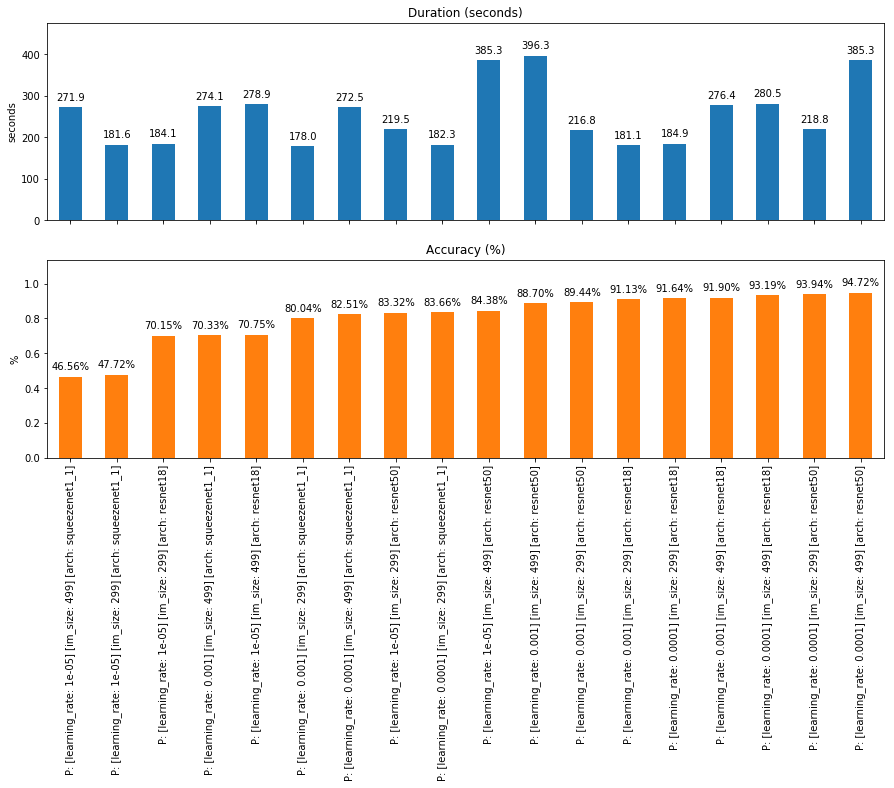

In [44]:
plot_df(df.mean(level=(1)), sort_by="accuracy", figsize=(15,8))

To make it easier to see which permutation did the best, we can plot the results using the `plot_df` helper function. This plot will help us easily see which parameters offer the highest accuracies.

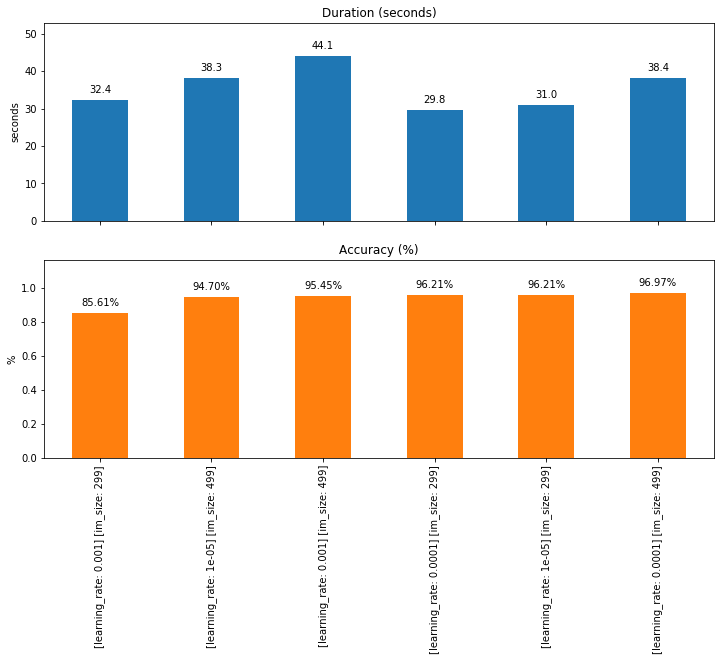

In [10]:
plot_df(df.mean(level=(1)), sort_by="accuracy")